In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

def read_cia(file,nus,nue):
    #read first line   
    com=file.split("/")[-1].replace("_2011.cia","")
    f = open(file, "r")
    header = f.readline()

    info=header.strip().split()
    print(info)
    nwav=int(info[3])
    wav=[]
    for i in range(0,nwav):
        column = f.readline().strip().split()
        wav.append(float(column[0]))
    f.close()

    f = open(file, "r")
    tcia=[]
    for line in f:
        line = line.strip()
        column = line.split()
        if column[0] == com:
            tcia.append(float(column[4]))
    f.close()
    tcia=np.array(tcia)

    wav=np.array(wav)
    ijwav=np.digitize([nus,nue],wav)
    newwav=np.array(wav[ijwav[0]:ijwav[1]+1])

    #read data                                                                  

    
    data=np.loadtxt(file,comments=com)
    nt=data.shape[0]/nwav
    data=data.reshape((int(nt),int(nwav),2))
    ac=data[:,ijwav[0]:ijwav[1]+1,1]
    return 1.e7/newwav,ac,tcia

In [41]:
wav,ac,tcia=read_cia("../../data/CIA/H2-H2_2011.cia",1.e7/1640.,1.e7/1630.0)

['H2-H2', '20.000', '10000.000', '9981', '200.0', '8.788E-45', '-.999', '6']


In [42]:
tcia

array([ 200.,  225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,
        425.,  450.,  475.,  500.,  525.,  550.,  575.,  600.,  625.,
        650.,  675.,  700.,  725.,  750.,  775.,  800.,  825.,  850.,
        875.,  900.,  925.,  950.,  975., 1000., 1025., 1050., 1075.,
       1100., 1125., 1150., 1175., 1200., 1225., 1250., 1275., 1300.,
       1325., 1350., 1375., 1400., 1425., 1450., 1475., 1500., 1525.,
       1550., 1575., 1600., 1625., 1650., 1675., 1700., 1725., 1750.,
       1775., 1800., 1825., 1850., 1875., 1900., 1925., 1950., 1975.,
       2000., 2025., 2050., 2075., 2100., 2125., 2150., 2175., 2200.,
       2225., 2250., 2275., 2300., 2325., 2350., 2375., 2400., 2425.,
       2450., 2475., 2500., 2525., 2550., 2575., 2600., 2625., 2650.,
       2675., 2700., 2725., 2750., 2775., 2800., 2825., 2850., 2875.,
       2900., 2925., 2950., 2975., 3000.])

In [45]:
np.shape(ac),np.shape(tcia)

((113, 38), (113,))

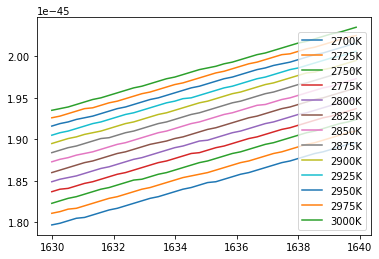

In [52]:
for i in range(100,113):
    plt.plot(wav,ac[i,:],label=str(int(tcia[i]))+"K")
plt.legend()

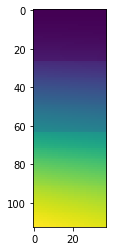

In [53]:
plt.imshow(ac)

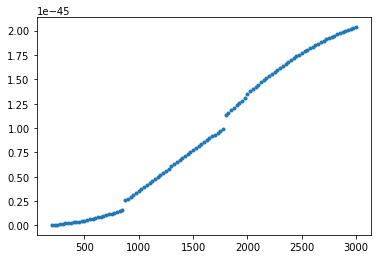

In [55]:
plt.plot(tcia,ac[:,0],".")